#Project 2
### Libraries used


In [1]:
import io
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [19]:
def getLinks():
  links=[]
  i=1
  for i in range(80,100):
    stri = 'https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/19'+str(i)+'%2000:00:00&enddate=12/31/19'+str(i)+'%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
    links.append(stri)

  stri = 'https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2000%2000:00:00&enddate=12/31/2000%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
  links.append(stri)

  for i in range(1,23):
    if i <9:
      stri = 'https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/200'+str(i)+'%2000:00:00&enddate=12/31/200'+str(i)+'%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
    elif i == 9:
      stri = 'https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2009%2000:00:00&enddate=12/31/2010%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
    else:
      stri = 'https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/20'+str(i)+'%2000:00:00&enddate=12/31/20'+str(i)+'%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false'
    print(stri)
    links.append(stri)
  return links

links = getLinks()

https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2001%2000:00:00&enddate=12/31/2001%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2002%2000:00:00&enddate=12/31/2002%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2003%2000:00:00&enddate=12/31/2003%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2004%2000:00:00&enddate=12/31/2004%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/2005%2000:00:00&enddate=12/31/2005%2000:00:00&daterange=d30&fre

In [23]:
Date = []
Open = []
High = []
Close = []
Low = []
Volumn = []
def getData(links):
  for url in links:
    print(url)
    r = requests.get(url)
    datas = BeautifulSoup(r.content, 'html.parser')
    res = str(datas)
    data = res.split("\n")
    for row in data[1:]:
      row = row.replace('"', '') 
      str1 = row.split(',')
      if len(str1) >= 5:
        Date.append(str1[0])
        Open.append(float(str1[1]))
        High.append(float(str1[2]))
        Close.append(float(str1[3]))
        Low.append(float(str1[4]))
        V = "".join(str1[5:])
        Volumn.append(int(V))
getData(links)

https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/1980%2000:00:00&enddate=12/31/1980%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/1981%2000:00:00&enddate=12/31/1981%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/1982%2000:00:00&enddate=12/31/1982%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/1983%2000:00:00&enddate=12/31/1983%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false
https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=01/01/1984%2000:00:00&enddate=12/31/1984%2000:00:00&daterange=d30&fre

In [24]:
df_aapl = pd.DataFrame(
    {'Date': Date,
     'Open': Open,
     'High': High,
     'Close': Close,
     'Low': Low,
     'Volumn':Volumn
    })

df_aapl

,Date,Open,High,Close,Low,Volumn
0,12/31/1984,0.13,0.13,0.13,0.13,207759991
1,12/28/1984,0.13,0.13,0.12,0.13,165334393
2,12/27/1984,0.12,0.12,0.12,0.12,98761596
3,12/26/1984,0.12,0.12,0.12,0.12,67177597
4,12/24/1984,0.12,0.12,0.12,0.12,67535997
...,...,...,...,...,...,...
9376,01/07/2022,172.89,174.14,171.03,172.17,86709148
9377,01/06/2022,172.70,175.30,171.64,172.00,96903961
9378,01/05/2022,179.61,180.17,174.64,174.92,94537602
9379,01/04/2022,182.63,182.94,179.12,179.70,99310438


# Crawling AAPL Stock Prices and save as DataFrame

# Data Pre-Processing(Check null values)

In [5]:
df_aapl.drop_duplicates()
df_aapl['Date']= pd.to_datetime(df_aapl['Date'])
df_aapl = df_aapl.sort_values(by = 'Date')
df_aapl = df_aapl.dropna()
df_aapl

,Date,Open,High,Close,Low,Volumn
38,1984-11-05,0.11,0.11,0.11,0.11,105369595
37,1984-11-06,0.12,0.12,0.11,0.12,225321590
36,1984-11-07,0.11,0.12,0.11,0.11,231548790
35,1984-11-08,0.11,0.11,0.11,0.11,88121596
34,1984-11-09,0.10,0.11,0.10,0.10,294134387
...,...,...,...,...,...,...
9371,2022-01-14,171.34,173.78,171.09,173.07,80440781
9370,2022-01-18,171.51,172.54,169.41,169.80,91168727
9369,2022-01-19,170.00,171.08,165.94,166.23,94814992
9368,2022-01-20,166.98,169.68,164.18,164.51,91420523


# Exploratory Data Analysis

In [6]:
df_aapl = df_aapl.set_index('Date')
df_aapl.describe()

,Open,High,Close,Low,Volumn
count,9381.000000,9381.000000,9381.000000,9381.000000,9.381000e+03
mean,14.828366,14.986575,14.670003,14.833799,3.569489e+08
std,29.701396,30.032419,29.381147,29.717198,3.464652e+08
min,0.060000,0.070000,0.060000,0.060000,2.150400e+07
25%,0.330000,0.340000,0.330000,0.330000,1.386448e+08
50%,0.580000,0.590000,0.570000,0.580000,2.406873e+08
75%,17.470000,17.610000,17.280000,17.450000,4.434920e+08
max,182.630000,182.940000,179.120000,182.010000,7.291978e+09


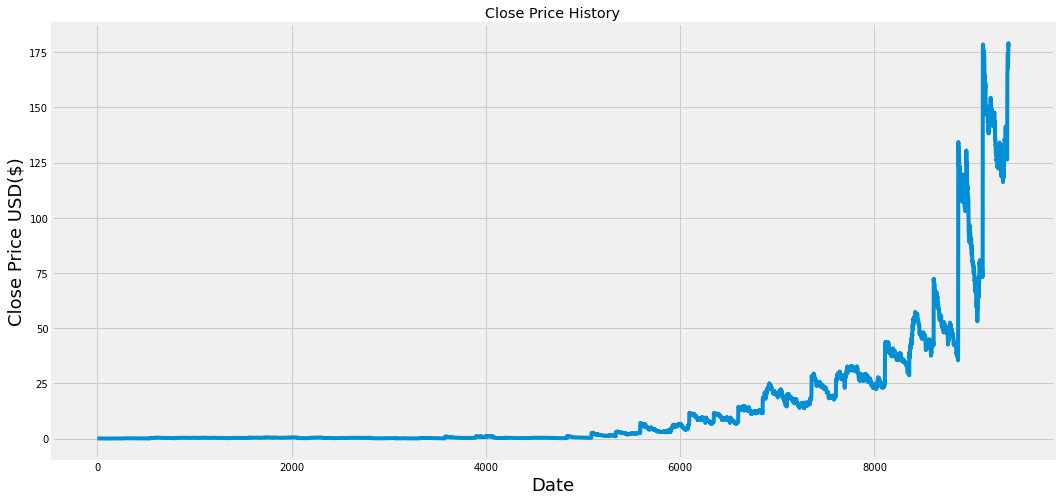

In [25]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_aapl['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

# Implement Linear Regression

In [26]:
dataset=df_aapl['Close'].values

test_len = 1000
data_len = 60
X = np.linspace(1,data_len, data_len)
X = X.reshape(-1,1)
y_pred = []
y_real = []
for n in range(test_len):  
  y = dataset[n-test_len-data_len:n-test_len]
  y = y.reshape(-1, 1)
  reg = LinearRegression()
  reg.fit(X, y)
  y_pred.append(float(reg.predict(np.array([[data_len + 1]]))))
  y_real.append(dataset[n-test_len])
print(len(y_pred))


1000


In [9]:
df_pred = df_aapl[-1000:]
df_pred = df_pred[['Open','High', 'Low', 'Volumn','Close']]
df_pred['Prediction'] = y_pred
df_pred

,Open,High,Low,Volumn,Close,Prediction
Date,,,,,,
2018-02-02,41.50,41.70,40.13,346375312,40.03,43.029994
2018-02-05,39.78,40.97,39.12,290954092,39.00,42.837136
2018-02-06,38.71,40.93,40.76,272975376,38.50,42.596989
2018-02-07,40.77,40.85,39.89,206434312,39.77,42.337271
2018-02-08,40.07,40.25,38.79,217562080,38.76,42.160672
...,...,...,...,...,...,...
2022-01-14,171.34,173.78,173.07,80440781,171.09,180.302972
2022-01-18,171.51,172.54,169.80,91168727,169.41,180.427034
2022-01-19,170.00,171.08,166.23,94814992,165.94,180.391407


In [10]:
rmse=np.sqrt( np.mean((np.array(y_real) - np.array(y_pred))**2))
print('RMSE', rmse)

RMSE 5.126239031846929


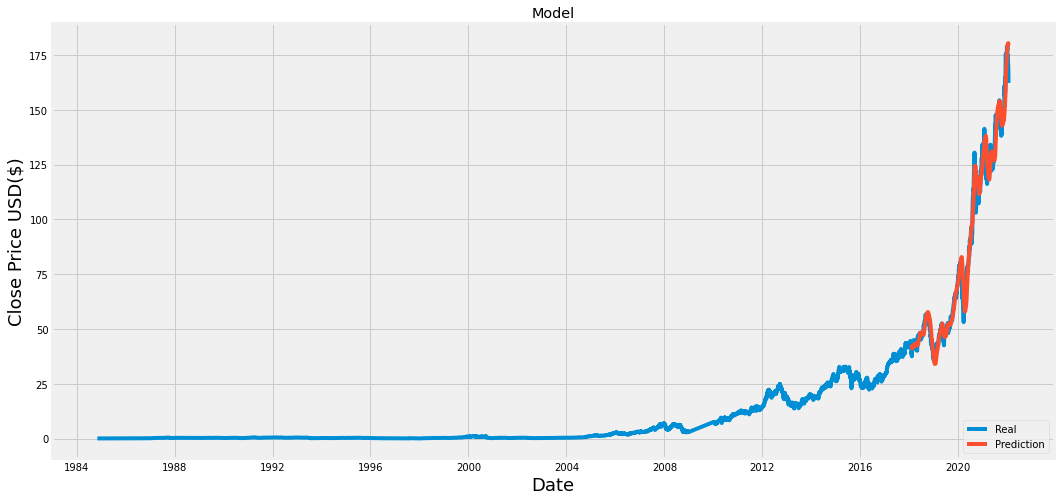

In [11]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(df_aapl['Close'])
plt.plot(df_pred[['Prediction']])
plt.legend(['Real','Prediction'],loc='lower right')
plt.show()

# Researcg Question2. Analysis of correlation between AAPL stock price and Covid cases.

In [12]:
def getCovidData(url):
  Date = []
  deathIncrease = []
  positiveIncrease = []
  print(url)
  r = requests.get(url)
  datas = BeautifulSoup(r.content, 'html.parser')
  res = str(datas)
  data = res.split("\n")
  for row in data[1:]:
    row = row.replace('"', '') 
    str1 = row.split(',')
    Date.append(str1[0])
    deathIncrease.append(int(str1[2]))
    positiveIncrease.append(float(str1[13]))
  return Date, deathIncrease, positiveIncrease


In [13]:
url = 'https://covidtracking.com/data/download/national-history.csv'
Date, deathIncrease, positiveIncrease = getCovidData(url)

https://covidtracking.com/data/download/national-history.csv


In [14]:
df_covid = pd.DataFrame(
    {'Date': Date,
     'deathIncrease': deathIncrease,
     'positiveIncrease': positiveIncrease,
    })
df_covid['Date']= pd.to_datetime(df_covid['Date'])
df_covid = df_covid.sort_values(by = 'Date')
df_covid = df_covid.set_index('Date')
df_covid

,deathIncrease,positiveIncrease
Date,,
2020-01-13,0,0.0
2020-01-14,0,0.0
2020-01-15,0,0.0
2020-01-16,0,0.0
2020-01-17,0,0.0
...,...,...
2021-03-03,2449,66836.0
2021-03-04,1743,65487.0
2021-03-05,2221,68787.0


In [15]:
df_merge = pd.concat([df_covid,df_aapl],join ='inner',axis=1)
df_merge['deathIncrease'] = df_merge['deathIncrease'].astype(float)
df_merge['positiveIncrease'] = df_merge['positiveIncrease'].astype(float)
df_merge['Close'] = df_merge['Close'].astype(float)
df_merge


,deathIncrease,positiveIncrease,Open,High,Close,Low,Volumn
Date,,,,,,,
2020-01-13,0.0,0.0,77.91,79.27,77.79,79.24,122086884
2020-01-14,0.0,0.0,79.18,79.39,78.04,78.17,162613844
2020-01-15,0.0,0.0,77.96,78.88,77.39,77.84,121923524
2020-01-16,0.0,0.0,78.40,78.93,78.02,78.81,108829000
2020-01-17,0.0,0.0,79.07,79.69,78.75,79.68,137816484
...,...,...,...,...,...,...,...
2021-03-01,1241.0,48092.0,123.75,127.93,122.79,127.79,116307906
2021-03-02,1728.0,54248.0,128.41,128.72,125.01,125.12,102260898
2021-03-03,2449.0,66836.0,124.81,125.71,121.84,122.06,112966305


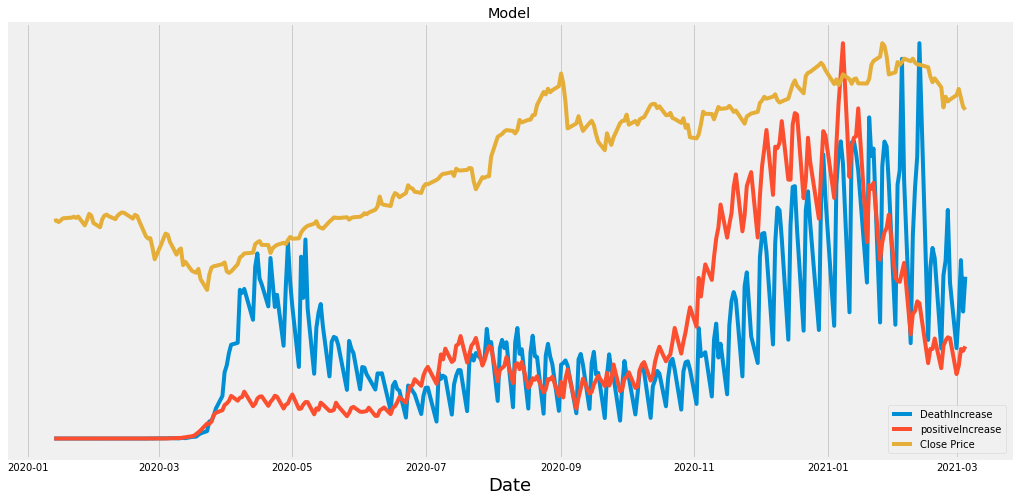

In [16]:
plt.figure(figsize=(16,8))
plt.yticks([])
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.plot(df_merge['deathIncrease']/max(df_merge['deathIncrease']))
plt.plot(df_merge['positiveIncrease']/max(df_merge['positiveIncrease']))
plt.plot(df_merge['Close']/max(df_merge['Close']))
plt.legend(['DeathIncrease','positiveIncrease','Close Price'],loc='lower right')
plt.show()

In [17]:
df_merge['deathIncrease'].corr(df_merge['Close'])

0.5669752215485055

In [18]:
df_merge['positiveIncrease'].corr(df_merge['Close'])

0.7194880806231649